In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/adult_income (2).csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47583 entries, 0 to 47582
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47583 non-null  int64 
 1   workclass        47583 non-null  object
 2   fnlwgt           47583 non-null  int64 
 3   education        47583 non-null  object
 4   educational-num  47583 non-null  int64 
 5   marital-status   47583 non-null  object
 6   occupation       47583 non-null  object
 7   relationship     47583 non-null  object
 8   race             47583 non-null  object
 9   gender           47583 non-null  object
 10  capital-gain     47583 non-null  int64 
 11  capital-loss     47583 non-null  int64 
 12  hours-per-week   47583 non-null  int64 
 13  native-country   47583 non-null  object
 14  income           47583 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.4+ MB


In [ ]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df = df.replace('?', np.NaN)

In [ ]:
df.isna().sum()

age                   0
workclass          2720
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2728
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      834
income                0
dtype: int64

In [ ]:
df['workclass'] = df['workclass'].replace(np.NaN, 'Others')
df['occupation'] = df['occupation'].replace(np.NaN, 'Others')
df['native-country'] = df['native-country'].replace(np.NaN, 'Others')
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head(4)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1


In [ ]:
df.income.value_counts()

0    36221
1    11362
Name: income, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


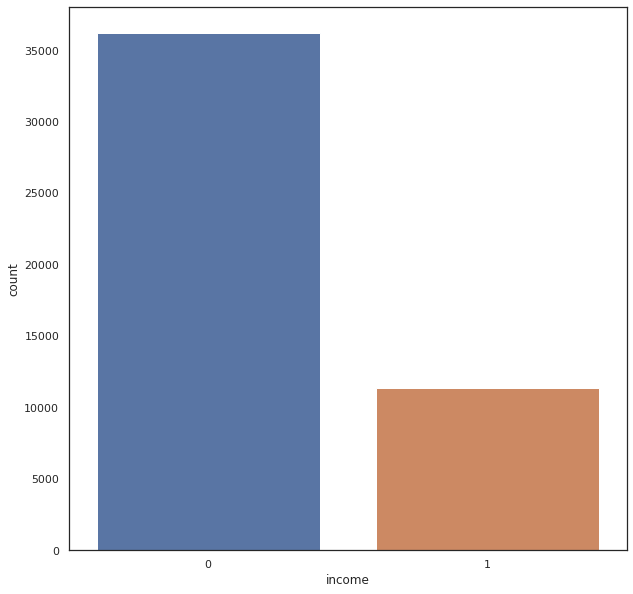

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(df['income'])

In [ ]:
df.drop(['fnlwgt','education'], axis=1, inplace=True)

In [ ]:
df.workclass = df.workclass.astype('category').cat.codes
df['marital-status'] = df['marital-status'].astype('category').cat.codes
df['occupation'] = df['occupation'].astype('category').cat.codes
df['relationship'] = df['relationship'].astype('category').cat.codes
df['race'] = df['race'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['native-country'] = df['native-country'].astype('category').cat.codes
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,7,4,6,3,2,1,0,0,40,39,0
1,38,4,9,2,4,0,4,1,0,0,50,39,0
2,28,1,12,2,11,0,4,1,0,0,40,39,1
3,44,4,10,2,6,0,2,1,7688,0,40,39,1
4,18,3,10,4,8,3,4,0,0,0,30,39,0


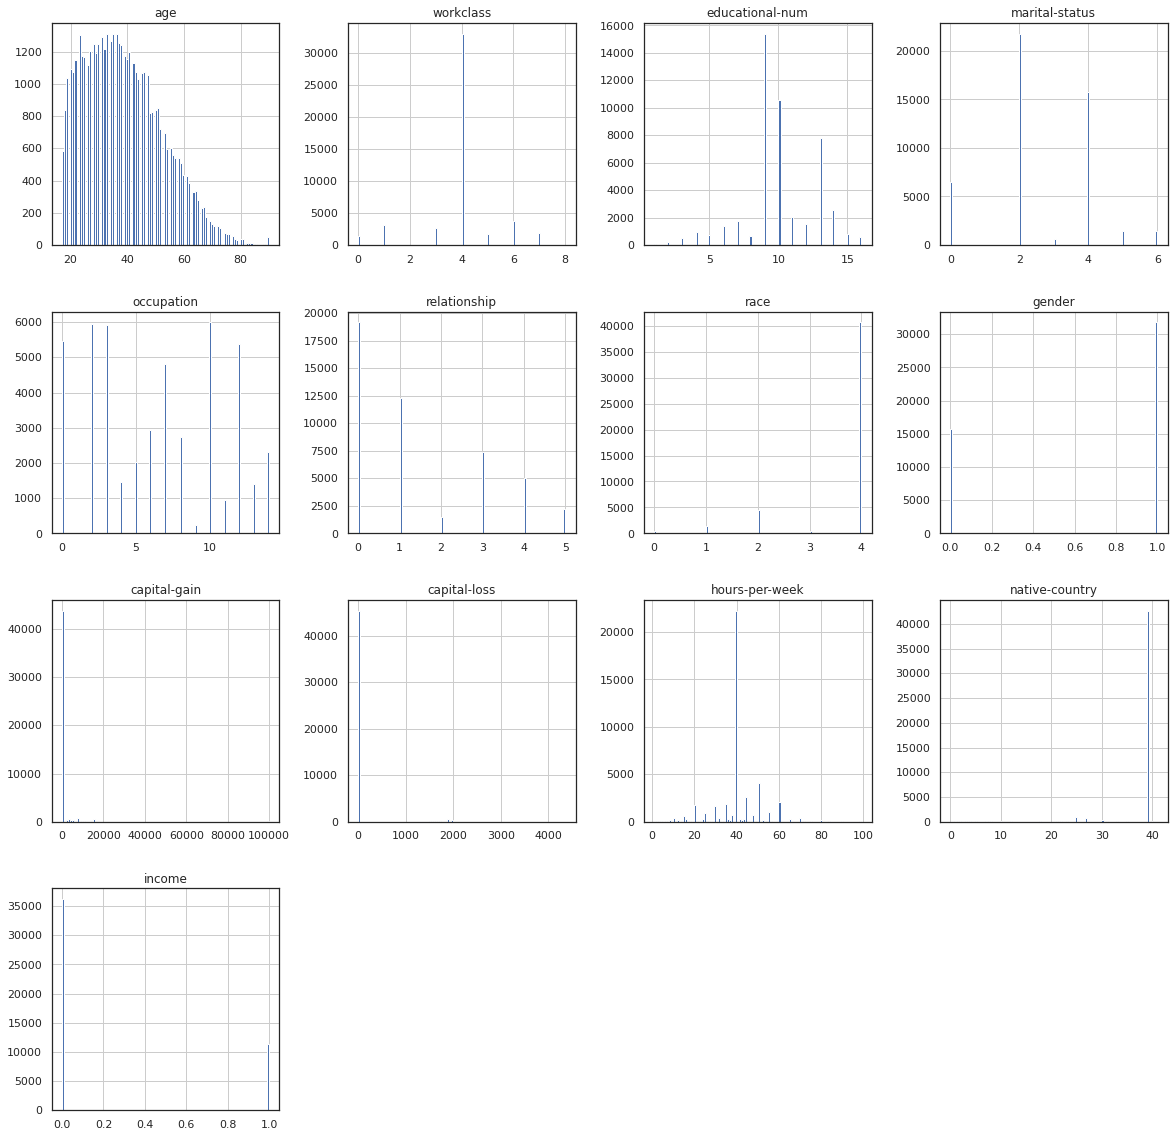

In [ ]:
df.hist(bins=100, figsize=(20,20))
plt.show()

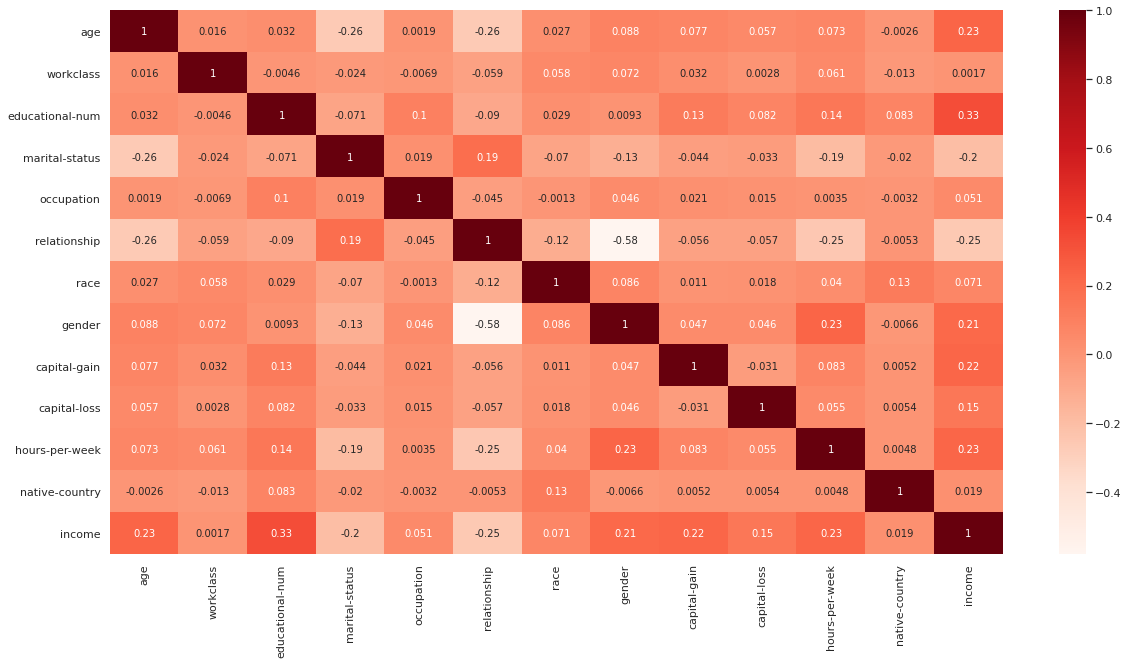

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True,cmap="Reds")

In [ ]:
x = df.drop(['income'], axis = 1) 
y = df["income"]
x.shape
x.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,7,4,6,3,2,1,0,0,40,39
1,38,4,9,2,4,0,4,1,0,0,50,39
2,28,1,12,2,11,0,4,1,0,0,40,39
3,44,4,10,2,6,0,2,1,7688,0,40,39
4,18,3,10,4,8,3,4,0,0,0,30,39


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

plt.figure(figsize=(8,6))
plt.show()

BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(x,y)
fit.scores_

<Figure size 576x432 with 0 Axes>

array([1.23872977e+04, 6.26824279e-02, 3.43595033e+03, 1.64084361e+03,
       3.57872455e+02, 5.40991465e+03, 4.72194254e+01, 7.22821683e+02,
       1.22207802e+08, 1.89220928e+06, 9.36359249e+03, 1.98485763e+01])

In [ ]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

In [ ]:
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']
f_Scores

,Feature,Score
0,age,1.238730e+04
1,workclass,6.268243e-02
2,educational-num,3.435950e+03
3,marital-status,1.640844e+03
4,occupation,3.578725e+02
5,relationship,5.409915e+03
6,race,4.721943e+01
7,gender,7.228217e+02
8,capital-gain,1.222078e+08
9,capital-loss,1.892209e+06


In [ ]:
dsc_best_features = f_Scores.nlargest(13,'Score')
dsc_best_features

,Feature,Score
8,capital-gain,1.222078e+08
9,capital-loss,1.892209e+06
0,age,1.238730e+04
10,hours-per-week,9.363592e+03
5,relationship,5.409915e+03
2,educational-num,3.435950e+03
3,marital-status,1.640844e+03
7,gender,7.228217e+02
4,occupation,3.578725e+02
6,race,4.721943e+01


In [ ]:
#df.drop(['workclass','native-country','race'], axis=1, inplace=True)

In [ ]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x.shape

(47583, 12)

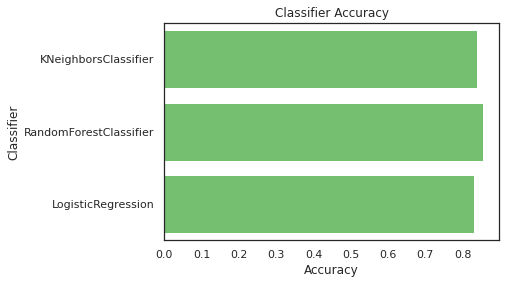

In [ ]:
#Finding The Best Classification model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

#sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")

In [ ]:
log.nlargest(3,'Accuracy')

,Classifier,Accuracy
0,RandomForestClassifier,0.854786
0,KNeighborsClassifier,0.838500
0,LogisticRegression,0.830304


## **Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'C':np.arange(0.0001,1),
              'solver':['newton-cg','lbfgs','sag','saga'],
              'penalty' : ['l1', 'l2', 'elasticnet','none'],
              'class_weight':['balanced','dict']
              }
gscv1 = GridSearchCV(LogisticRegression(), param_grid=param_grid)
gscv1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.0001]),
                         'class_weight': ['balanced', 'dict'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [ ]:
gscv1.best_params_

{'C': 0.0001, 'class_weight': 'dict', 'penalty': 'none', 'solver': 'sag'}

In [ ]:
gscv1.best_score_

0.8243840504665354

In [ ]:
from sklearn.metrics import confusion_matrix
model_LR = LogisticRegression(C=0.0001, solver='sag',penalty='none',class_weight='dict').fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [ ]:
y_pred1 = model_LR.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
accuracy_score(y_test, y_pred1)

0.8300935168645581

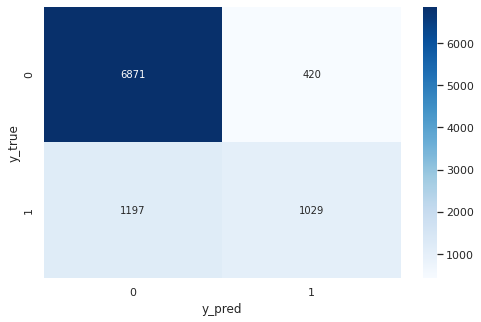

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7291
           1       0.71      0.46      0.56      2226

    accuracy                           0.83      9517
   macro avg       0.78      0.70      0.73      9517
weighted avg       0.82      0.83      0.82      9517



Prediction

In [ ]:
def data_process(df_predict) :
  
    data = df_predict.replace('?', np.NaN)
    data['workclass'] = data['workclass'].replace(np.NaN, 'Others')
    #data['income'] = data['income'].astype('category').cat.codes
    data['income']=data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
    data.drop(['education','fnlwgt'], axis=1, inplace=True)
    data.workclass = data.workclass.astype('category').cat.codes
    data['marital-status'] = data['marital-status'].astype('category').cat.codes
    data['occupation'] = data['occupation'].astype('category').cat.codes
    data['relationship'] = data['relationship'].astype('category').cat.codes
    data['race'] = data['race'].astype('category').cat.codes
    data['gender'] = data['gender'].astype('category').cat.codes
    data['native-country'] = data['native-country'].astype('category').cat.codes
    
    return data

In [ ]:
df_predict = pd.read_csv('/content/drive/MyDrive/Dataset/adult_income_predict.csv')
data_predict = data_process(df_predict)

data_predict.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,41,7,14,1,9,0,4,1,7298,0,60,28,1
1,40,0,11,1,9,5,4,0,0,0,65,28,1
2,27,4,9,3,4,2,4,1,0,0,40,18,0
3,41,4,13,1,0,0,1,1,3103,0,35,22,1
4,51,4,13,1,3,0,4,1,0,0,60,28,1


In [ ]:
x_predict = data_predict.drop(['income'], axis = 1)
y_result = data_predict['income']

from sklearn import preprocessing
x_pred= preprocessing.StandardScaler().fit(x_predict).transform(x_predict.astype(float))
x_pred.shape

(891, 12)

In [ ]:
y_predict = model_LR.predict(x_pred)

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
accuracy_score(y_result, y_predict)

0.8327721661054994

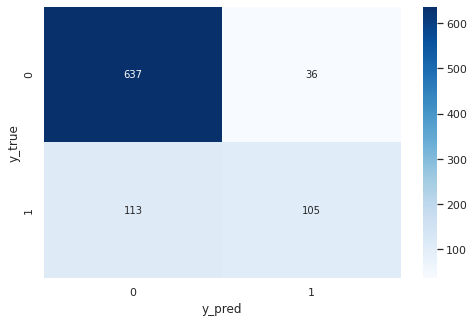

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_result, y_predict), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print(classification_report(y_result,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       673
           1       0.74      0.48      0.58       218

    accuracy                           0.83       891
   macro avg       0.80      0.71      0.74       891
weighted avg       0.82      0.83      0.82       891



# **KNN**

In [ ]:
param_grid = {'n_neighbors':np.arange(2,30),'weights':['uniform','distance']}
gscv2 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid,cv=10)
gscv2.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gscv2.best_params_

{'n_neighbors': 26, 'weights': 'uniform'}

In [ ]:
gscv2.best_score_

0.8429566921900788

In [ ]:
from sklearn.metrics import accuracy_score
model_knn = KNeighborsClassifier(n_neighbors=26, weights='uniform')
model_knn.fit(x_train,y_train)
y_pred2 = model_knn.predict(x_test)
acc = accuracy_score(y_test, y_pred2)
acc

0.8437532835977724

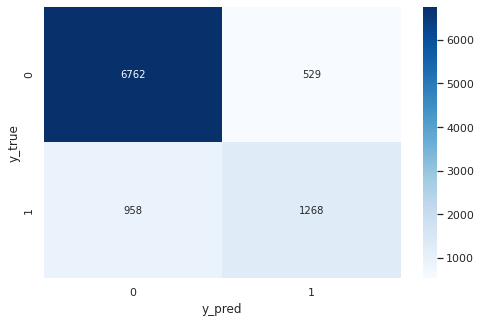

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7291
           1       0.71      0.57      0.63      2226

    accuracy                           0.84      9517
   macro avg       0.79      0.75      0.77      9517
weighted avg       0.84      0.84      0.84      9517



Prediction

In [ ]:
y_predict2 = model_knn.predict(x_pred)

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
accuracy_score(y_result, y_predict2)

0.8395061728395061

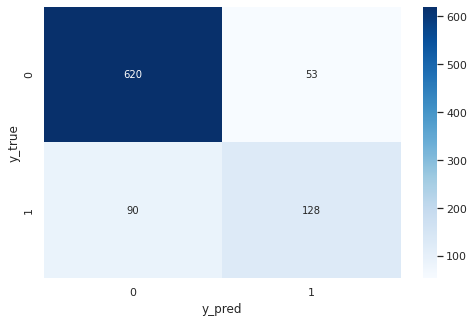

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_result, y_predict2), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print(classification_report(y_result,y_predict2))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       673
           1       0.71      0.59      0.64       218

    accuracy                           0.84       891
   macro avg       0.79      0.75      0.77       891
weighted avg       0.83      0.84      0.83       891



# **Random** **Forest**

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50,criterion="entropy",oob_score = True) 

param_grid = { 
    'n_estimators': [200,500,700,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}

gscv3 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
gscv3.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True, rando

In [ ]:
gscv3.best_params_

{'max_features': 'sqrt', 'n_estimators': 1000}

In [ ]:
gscv3.best_score_

0.8530709188110903

In [ ]:
CV_best = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=1000,criterion="entropy",oob_score = True)
CV_best.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_pred3 = CV_best.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.8575181254597037

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred3)

array([[6754,  537],
       [ 819, 1407]])

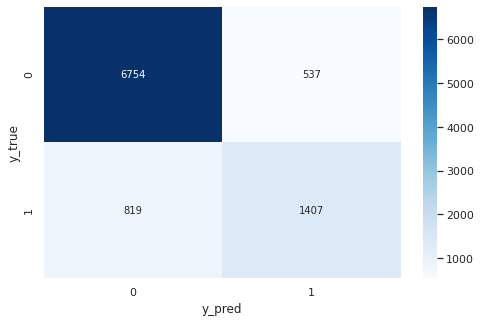

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7291
           1       0.72      0.63      0.67      2226

    accuracy                           0.86      9517
   macro avg       0.81      0.78      0.79      9517
weighted avg       0.85      0.86      0.85      9517



Prediction

In [ ]:
y_predict3 = CV_best.predict(x_pred)

In [ ]:
accuracy_score(y_result, y_predict3)

0.8406285072951739

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_result, y_predict3)

array([[613,  60],
       [ 82, 136]])

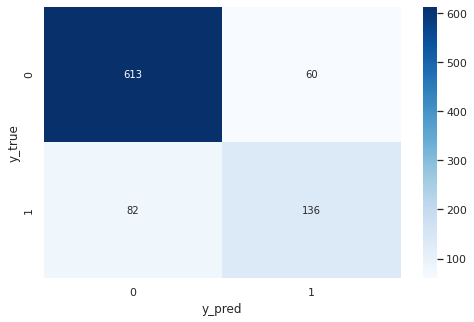

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_result, y_predict3), annot=True, fmt=".0f", ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
print(classification_report(y_result,y_predict3))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       673
           1       0.69      0.62      0.66       218

    accuracy                           0.84       891
   macro avg       0.79      0.77      0.78       891
weighted avg       0.84      0.84      0.84       891

